In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import os
os.chdir("C:\\Users\\Asus\\Downloads")
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [2]:
df.shape

(270, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
print(df.isna().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [6]:
df["Heart Disease"].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [8]:
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = rf_model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ",conf_matrix)
print("Classification Report: ",class_report)

Accuracy:  0.8024691358024691
Confusion Matrix:  [[45  4]
 [12 20]]
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.92      0.85        49
           1       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



In [13]:
print(X_test)
print(y_test)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
30    57    1                3  128          229             0            2   
116   46    1                4  120          249             0            2   
79    56    1                2  120          236             0            0   
127   52    0                3  136          196             0            2   
196   58    0                4  100          248             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
55    41    0                2  105          198             0            0   
97    58    1                4  100          234             0            0   
200   68    1                3  118          277             0            0   
38    42    1                3  130          180             0            0   
154   51    0                3  130          256             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [14]:
rf_model.predict([[51,0,3,130,256,0,2,149,0,0.5,1,0,3]]) # good prediction

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

<Axes: xlabel='Heart Disease', ylabel='count'>

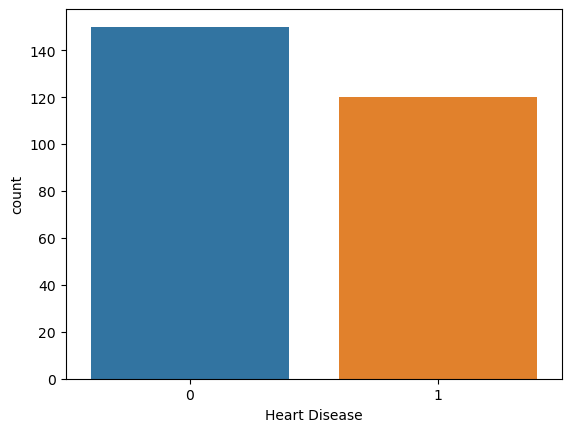

In [15]:
# Distribution of target variable (Heart Disease)
sns.countplot(x='Heart Disease', data=df)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

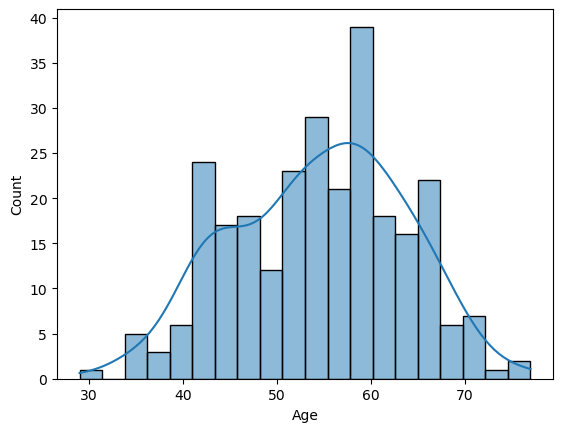

In [16]:
sns.histplot(df['Age'], kde=True, bins=20)

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

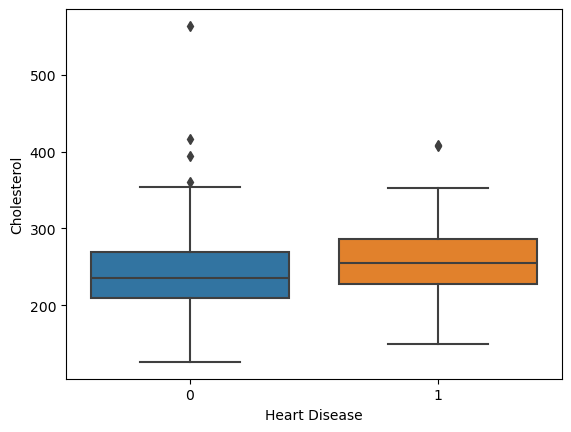

In [17]:
sns.boxplot(x='Heart Disease', y='Cholesterol', data=df)

<Axes: xlabel='Heart Disease', ylabel='Max HR'>

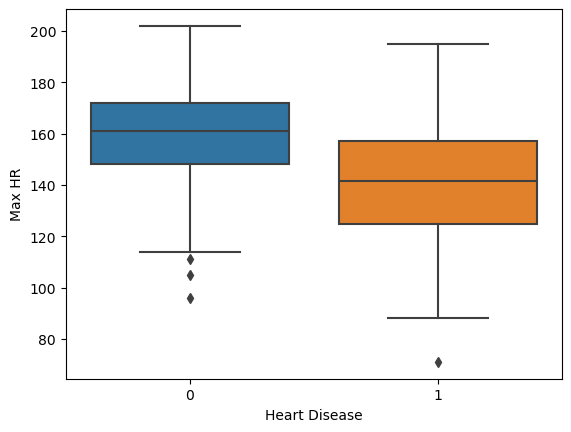

In [18]:
sns.boxplot(x='Heart Disease', y='Max HR', data=df)

<Axes: xlabel='Heart Disease', ylabel='Age'>

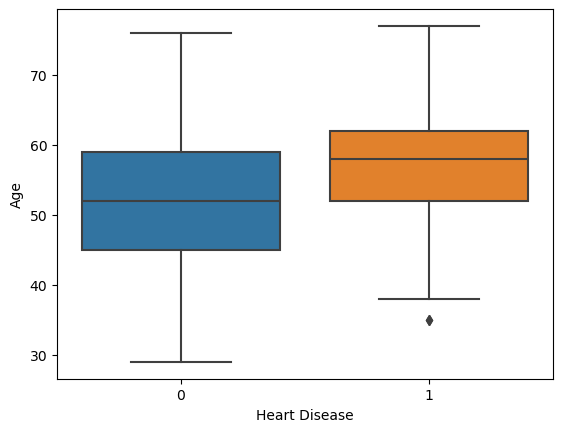

In [19]:
sns.boxplot(x='Heart Disease', y='Age', data=df)